In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
import glob
path = 'Renewable Energy Data/Andhra Pradesh'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename,index_col=None, header=0,skiprows=2,usecols=[0,1,2,3,4,7])
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [66]:
frame['Date']=frame['Year'].astype(str) + frame['Month'].astype(str).str.zfill(2) + frame['Day'].astype(str).str.zfill(2) + frame['Hour'].astype(str).str.zfill(2)+frame['Minute'].astype(str)

frame['Date'] = pd.to_datetime(frame['Date'], format='%Y%m%d%H%M')

In [67]:
frame.head()

,Year,Month,Day,Hour,Minute,GHI,Date
0,2001,1,1,0,0,0,2001-01-01 00:00:00
1,2001,1,1,1,0,0,2001-01-01 01:00:00
2,2001,1,1,2,0,0,2001-01-01 02:00:00
3,2001,1,1,3,0,0,2001-01-01 03:00:00
4,2001,1,1,4,0,0,2001-01-01 04:00:00


In [68]:
import datetime as dt

df_all = frame[['Date','GHI']]
single = df_all['Date']

In [69]:
df_all.set_index('Date',inplace=True)

In [70]:
df_all = df_all.between_time('09:00','15:00')

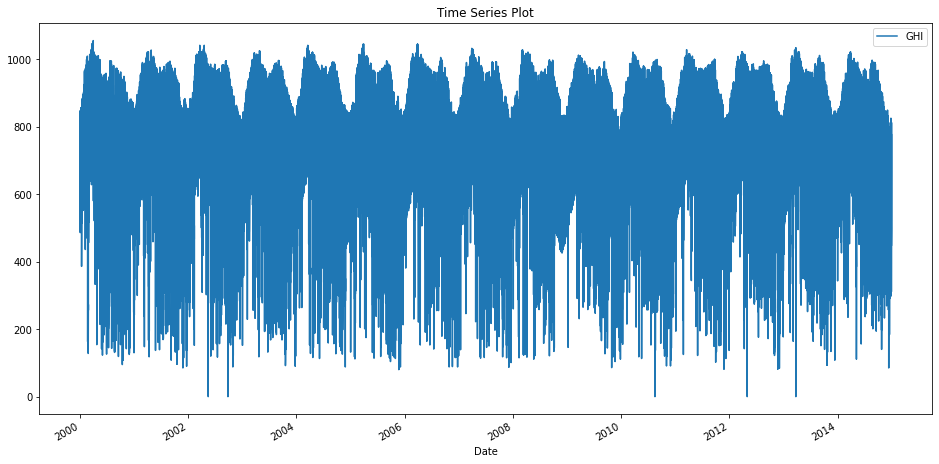

In [71]:
df_all.plot(figsize=[16,8],title='Time Series Plot')

In [72]:
df_all.fillna(df_all.mean(),inplace=True)

In [73]:
y=df_all['GHI'].resample('W-MON').mean()

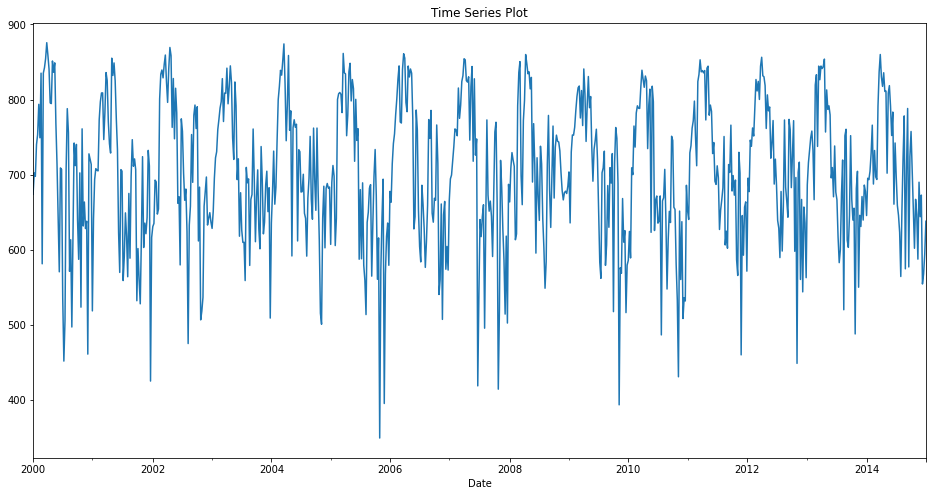

In [74]:
y.plot(figsize=[16,8],title='Time Series Plot')

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [76]:
result=seasonal_decompose(y,model='additive')

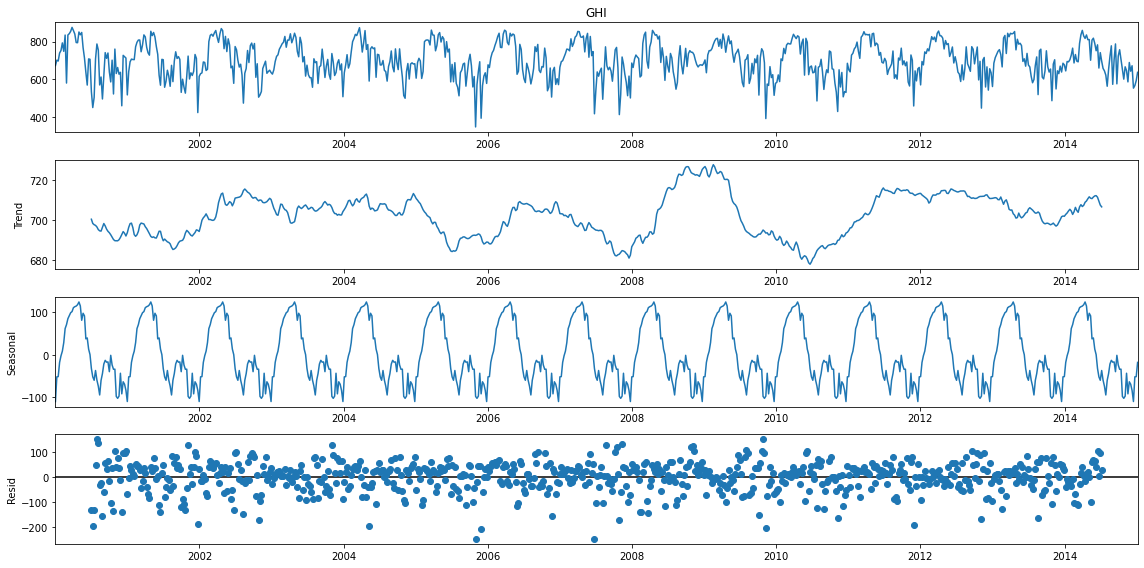

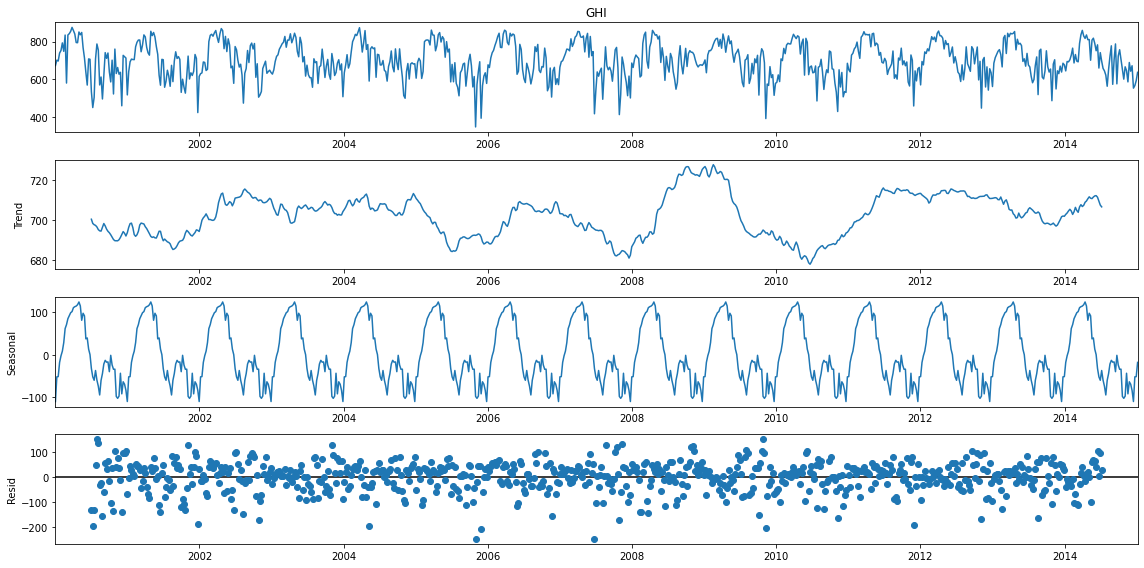

In [77]:
import pylab
pylab.rcParams['figure.figsize'] = (16, 8)
result.plot()

In [78]:
import statsmodels.tsa.api as smtsa

In [79]:
import statsmodels.api as sm

In [80]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [27]:
modelparams = []
#best_model = []
#min_aic = 15000
for param in pdq:
    for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            except:
                continue
            results = mod.fit()
            modelparams.append([param,param_seasonal,results.aic])
            #if(results.aic < min_aic):
                #print('ARIMA{}x{}52 - AIC:{}'.format(param, param_seasonal, results.aic))
                #min_aic = results.aic
                #best_model = [param,param_seasonal,results.aic]

/home/kalit/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [28]:
modelparams

[[(0, 0, 0), (0, 0, 0, 52), 12502.648437281034],
 [(0, 0, 0), (0, 0, 1, 52), 10866.307513293388],
 [(0, 0, 0), (0, 1, 0, 52), 8573.990361764869],
 [(0, 0, 0), (0, 1, 1, 52), 7657.219208524059],
 [(0, 0, 0), (1, 0, 0, 52), 8587.432754230937],
 [(0, 0, 0), (1, 0, 1, 52), 8287.61653094319],
 [(0, 0, 0), (1, 1, 0, 52), 7798.222410633451],
 [(0, 0, 0), (1, 1, 1, 52), 7650.9388627106855],
 [(0, 0, 1), (0, 0, 0, 52), 11564.416607649002],
 [(0, 0, 1), (0, 0, 1, 52), 10219.454303962108],
 [(0, 0, 1), (0, 1, 0, 52), 8539.402474581877],
 [(0, 0, 1), (0, 1, 1, 52), 7616.015971317458],
 [(0, 0, 1), (1, 0, 0, 52), 8600.241530089803],
 [(0, 0, 1), (1, 0, 1, 52), 8248.705740774723],
 [(0, 0, 1), (1, 1, 0, 52), 7770.189913409566],
 [(0, 0, 1), (1, 1, 1, 52), 7612.419569728836],
 [(0, 1, 0), (0, 0, 0, 52), 9102.183227441717],
 [(0, 1, 0), (0, 0, 1, 52), 8447.177662145245],
 [(0, 1, 0), (0, 1, 0, 52), 8923.917419370868],
 [(0, 1, 0), (0, 1, 1, 52), 7957.050647350536],
 [(0, 1, 0), (1, 0, 0, 52), 8460.282

In [29]:
#LITE
# mod = sm.tsa.statespace.SARIMAX(y['2000':'2012'], order=(0, 0, 1), seasonal_order=(1, 1, 1, 52), enforce_stationarity=False, enforce_invertibility=False)
# results = mod.fit()
# print(results.summary().tables[1])

In [30]:
mod2 = sm.tsa.statespace.SARIMAX(y['2000':'2012'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52), enforce_stationarity=False, enforce_invertibility=False)
results2 = mod2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                GHI   No. Observations:                  679
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -3219.978
Date:                            Tue, 17 Nov 2020   AIC                           6449.957
Time:                                    20:18:24   BIC                           6471.702
Sample:                                01-03-2000   HQIC                          6458.440
                                     - 12-31-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2300      0.040      5.803      0.000       0.152       0.308
ma.L1         -1.0000     11.184     -0.089      0.929     -22.921      20.921
ar.S.L52       0.0741      0.021      3.578      0.000       0.034       0.115
ma.S.L52      -0.8454      0.044    -19.320      0.000      -0.931      -0.760
sigma2      4140.9326   4.63e+04      0.089      0.929   -8.66e+04    9.49e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):               126.02
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -0.69
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
#LITE
# pred = results.get_prediction(start=pd.to_datetime('2013-01-07'),end=pd.to_datetime('2014-12-29'), dynamic=False)

# ax = y['2013':'2014'].plot(label='Observed')

# pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))

# #Generate a confidence interval
# pred_ci = pred.conf_int()
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.2)

# ax.set_xlabel('Date')
# ax.set_ylabel('GHI')
# plt.legend()
# plt.show()

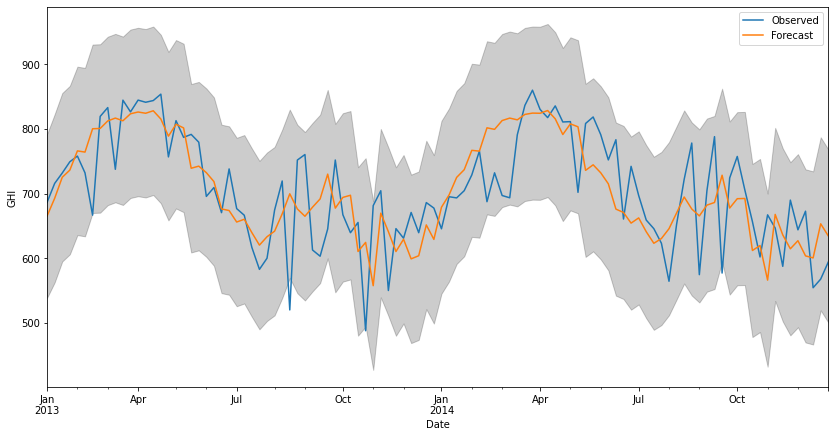

In [42]:
pred = results2.get_prediction(start=pd.to_datetime('2013-01-07'),end=pd.to_datetime('2014-12-29'), dynamic=False)

#Plot observed data
ax = y['2013':'2014'].plot(label='Observed')

#Plot predicted data
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=1, figsize=(14, 7))

#Generate a confidence interval
pred_ci = pred.conf_int()
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('GHI')
plt.legend()
plt.show()

In [49]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [50]:
y_forecasted = pred.predicted_mean
y_truth = y['2013-01-07':'2014-12-29']

mean_absolute_percentage_error(y_truth,y_forecasted)

7.0979108457549485